In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:

df = pd.read_excel("../data/Abbottabad/carbon monoxide.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,637
1,637
2,634
3,637
4,631
...,...
1018,835
1019,835
1020,831
1021,831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sensor Value  1023 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [4]:

Days = pd.date_range(start="2017-09-07",end="2020-06-25")

In [5]:
Days

DatetimeIndex(['2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-16',
               ...
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25'],
              dtype='datetime64[ns]', length=1023, freq='D')

In [6]:
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe

,ds,y
0,2017-09-07,637
1,2017-09-08,637
2,2017-09-09,634
3,2017-09-10,637
4,2017-09-11,631
...,...,...
1018,2020-06-21,835
1019,2020-06-22,835
1020,2020-06-23,831
1021,2020-06-24,831


In [7]:

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1023 non-null   object
 1   y       1023 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


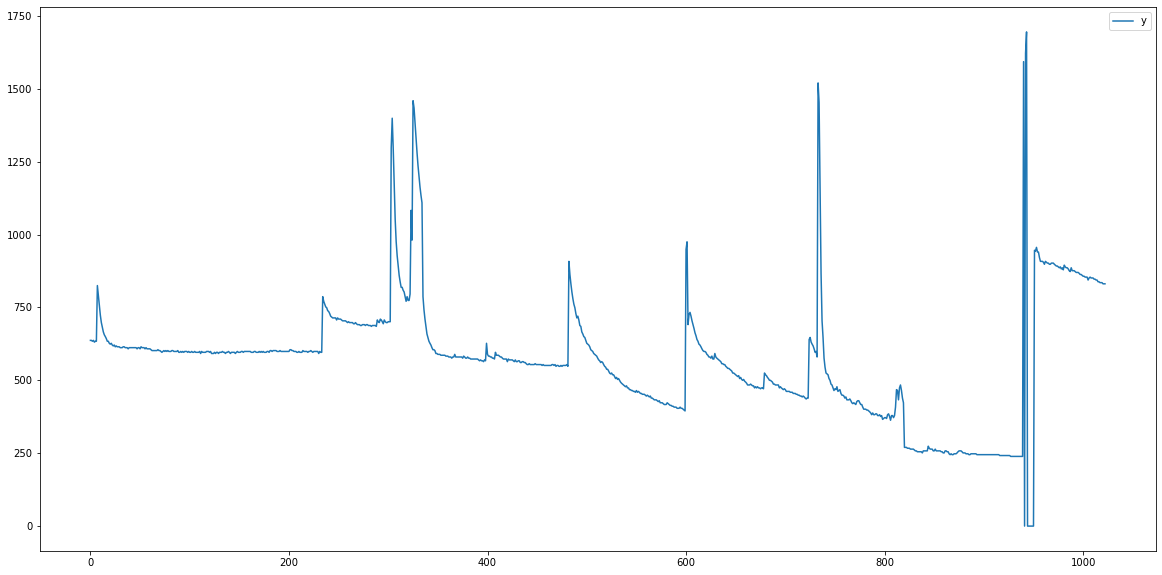

In [8]:
dataframe.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
def addfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','# Lags Used','# Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if(result[1]<= 0.05):
        print("Data is stationary")
    else:
        print("Data is non stationary")

In [10]:
addfuller_test(dataframe['y'])

ADF Test Statistic : -2.7815212709819006
p-value : 0.06096218815102259
# Lags Used : 14
# Observations Used : 1008
Data is non stationary


In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot

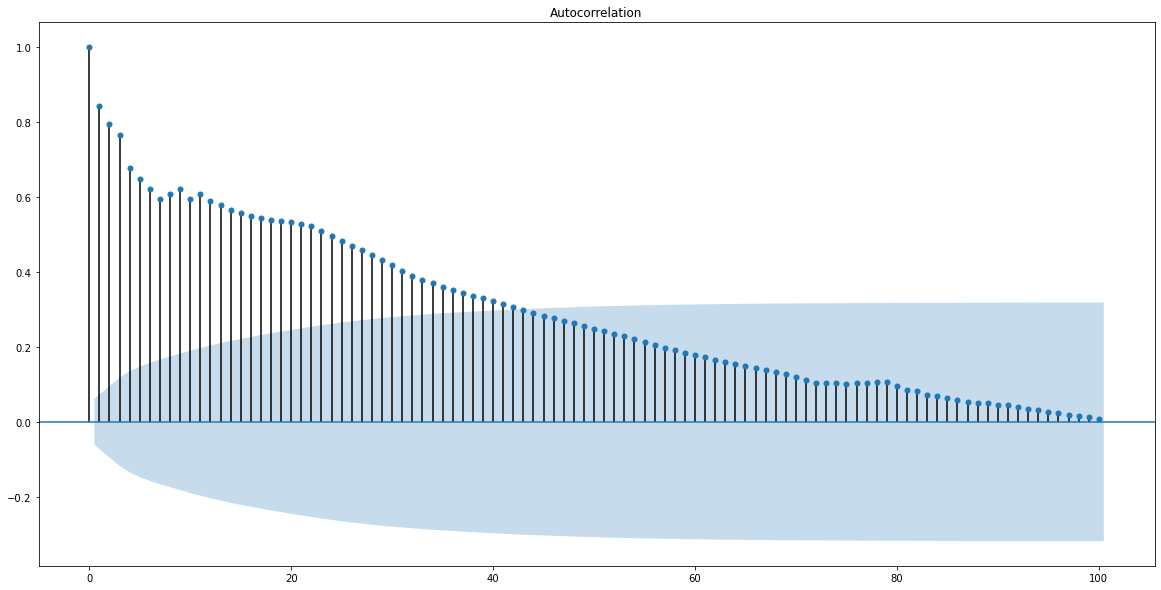

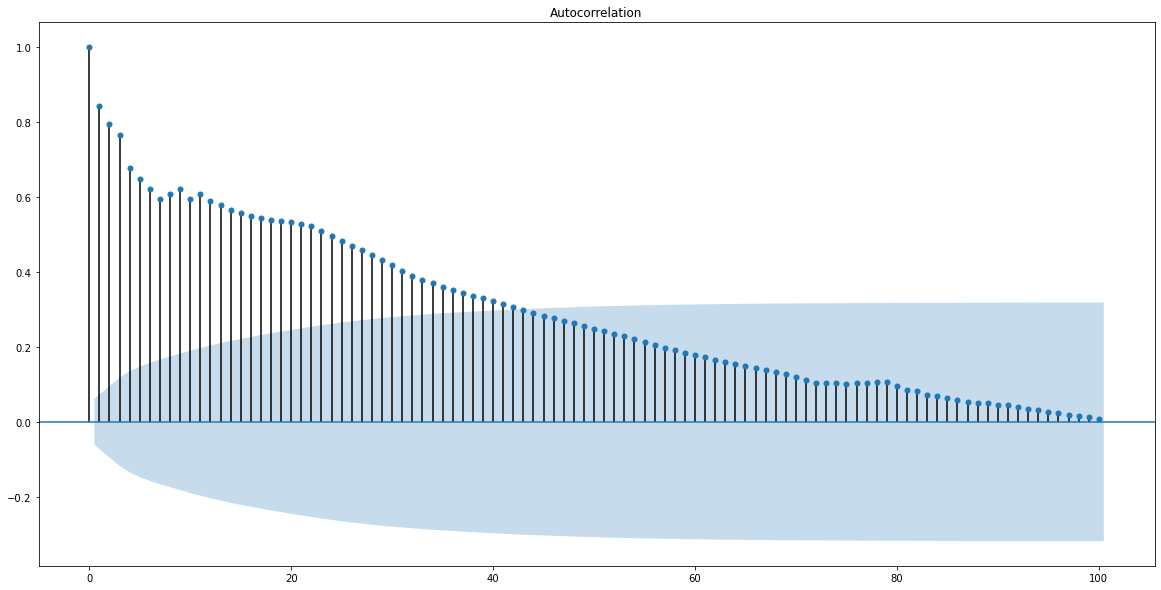

In [12]:
plot_acf(dataframe['y'],lags=100)

In [13]:
# q = 50

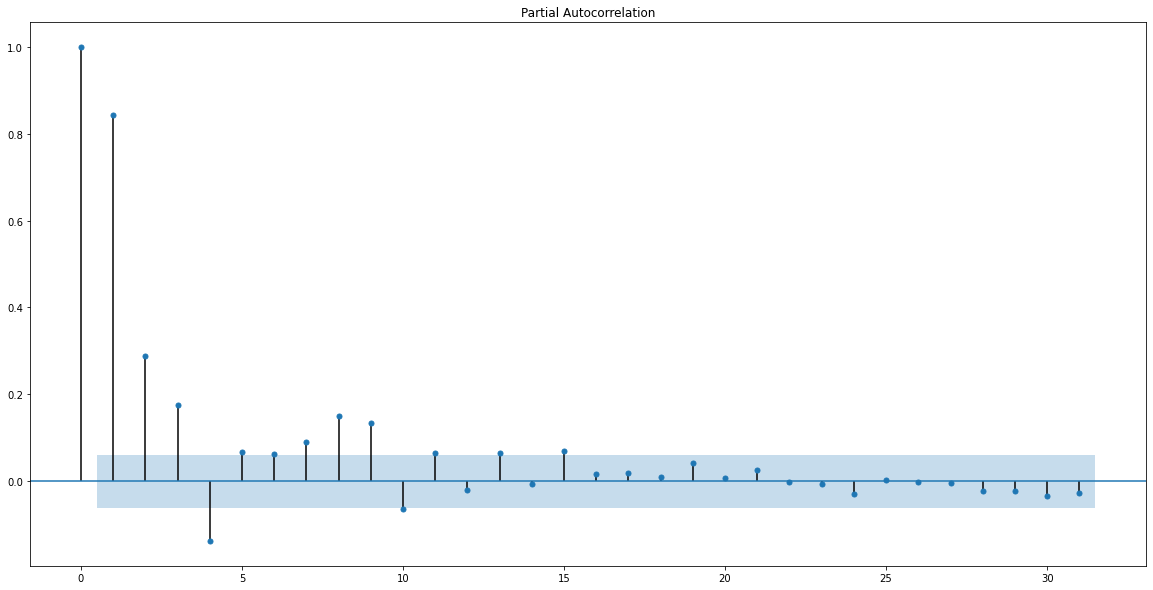

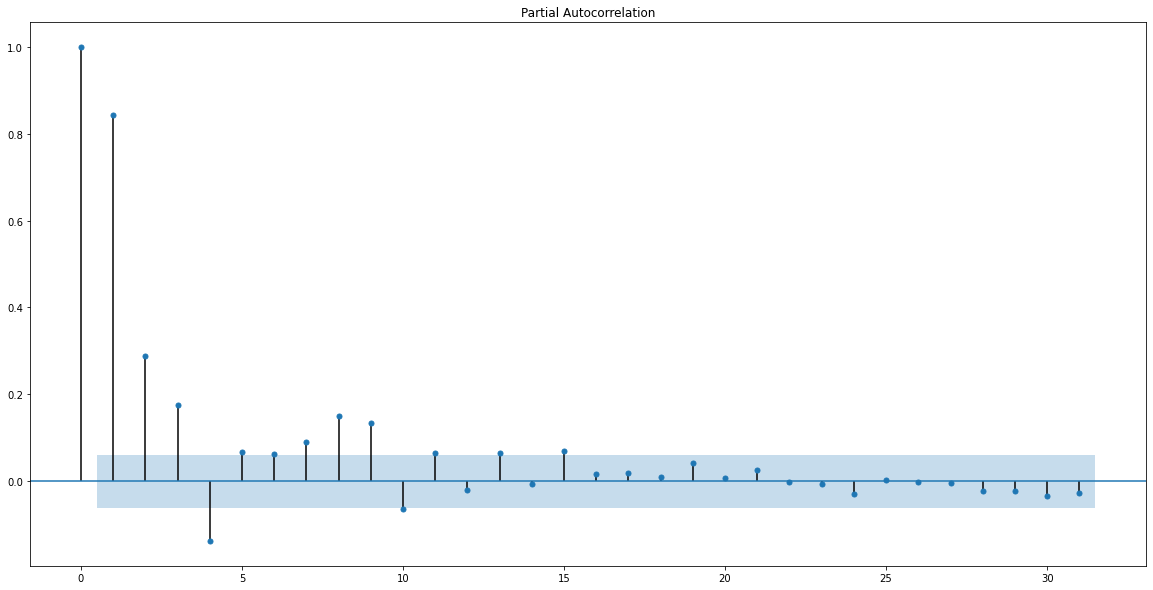

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataframe['y'])

In [15]:
# p= 20

In [16]:
import statsmodels.api as sm 
X = dataframe['y'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

model = sm.tsa.statespace.SARIMAX(history,order=(20,0,50),seasonal_order=(0,0,0,0))
model_fit = model.fit()

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [17]:
preds = model_fit.forecast(steps=len(test))

In [18]:
preds = preds.tolist()
preds

[454.1459776379362,
 454.0274534732892,
 463.8289004061087,
 474.0740411704903,
 466.4504548924167,
 467.70340690649317,
 464.94255134413356,
 468.38862154369696,
 462.20390180461834,
 463.92440716525005,
 468.10450089992304,
 463.45750530128754,
 463.05063283004796,
 473.39122266770147,
 470.6973384189539,
 471.8535955109935,
 481.6171548027439,
 482.3148586905904,
 484.81650828412876,
 479.3011708565558,
 489.1359734923959,
 482.9676942902368,
 482.94824797099506,
 486.48736486621686,
 486.5220029339565,
 482.3260399232468,
 488.6399499077815,
 487.2328080046163,
 485.5554050296239,
 489.32273055908144,
 491.36427870862315,
 493.93324862700155,
 489.5289567063951,
 496.4811974485452,
 493.9289659569946,
 491.1523737152428,
 493.64259689146115,
 496.13080314946603,
 489.5041701688982,
 493.2671609961742,
 493.5656346794557,
 492.67463643595016,
 490.34800930510414,
 493.38862610362617,
 495.8496061099508,
 489.5249194772492,
 494.382161708741,
 495.1929542929598,
 491.3278790068748,
 

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test,preds)
mse

88371.81576823568

In [20]:
import pickle
with open('carbonmonoxide_model_arima.pkl', 'wb') as fid:
    pickle.dump(model_fit, fid)

In [21]:
forecasting={
    
    'Day-1':preds[0],
    'Day-2':preds[1],
    'Day-3':preds[2],
    'Day-4':preds[3],
    'Day-5':preds[4],
    'Day-6':preds[5],
    'Day-7':preds[6],
    'MSE': mse
}

In [22]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("../config/sensors-forecasting-fc27d-firebase-adminsdk-krgvi-403182645e.json")
firebase_admin.initialize_app(cred,{'databaseURL':'https://sensors-forecasting-fc27d-default-rtdb.firebaseio.com/'})
ref = db.reference("/Models/ARIMA")
upload_ref = ref.child('Carbonmonoxide')
upload_ref.update(forecasting)